In [2]:
# import libraries
import pandas as pd
import numpy as np
import seaborn as sns

In [68]:
# import data
# data URL: https://catalog.data.gov/dataset/accidental-drug-related-deaths-2012-2018
# Public Access: This dataset is intended for public access and use
# Publisher: data.ct.gov
data = pd.read_csv("Accidental_Drug_Related_Deaths_2012-2020.csv")
data.head()

,ID,Date,Date Type,Age,Sex,Race,Residence City,Residence County,Residence State,Death City,...,Morphine (Not Heroin),Hydromorphone,Xylazine,Other,Opiate NOS,Any Opioid,Manner of Death,DeathCityGeo,ResidenceCityGeo,InjuryCityGeo
0,12-0187,7/17/2012,DateofDeath,34.0,Female,White,MAHOPAC,PUTNAM,NaN,DANBURY,...,NaN,NaN,NaN,Duster,NaN,NaN,Accident,"DANBURY, CT\n(41.393666, -73.451539)",NaN,"CT\n(41.575155, -72.738288)"
1,12-0258,10/1/2012,DateofDeath,51.0,Male,White,PORTLAND,MIDDLESEX,NaN,PORTLAND,...,NaN,NaN,NaN,NaN,NaN,NaN,Accident,"PORTLAND, CT\n(41.581345, -72.634112)","PORTLAND, CT\n(41.581345, -72.634112)","CT\n(41.575155, -72.738288)"
2,13-0146,4/28/2013,DateofDeath,28.0,Male,White,NaN,NaN,NaN,HARTFORD,...,NaN,NaN,NaN,NaN,NaN,NaN,Accident,"HARTFORD, CT\n(41.765775, -72.673356)","CT\n(41.575155, -72.738288)","CT\n(41.575155, -72.738288)"
3,14-0150,4/6/2014,DateofDeath,46.0,Male,White,WATERBURY,NaN,NaN,TORRINGTON,...,NaN,NaN,NaN,NaN,NaN,NaN,Accident,"TORRINGTON, CT\n(41.812186, -73.101552)","WATERBURY, CT\n(41.554261, -73.043069)","CT\n(41.575155, -72.738288)"
4,14-0183,4/27/2014,DateofDeath,52.0,Male,White,NEW LONDON,NaN,NaN,NEW LONDON,...,NaN,NaN,NaN,NaN,NaN,NaN,Accident,"NEW LONDON, CT\n(41.355167, -72.099561)","NEW LONDON, CT\n(41.355167, -72.099561)","CT\n(41.575155, -72.738288)"


In [69]:
# drop redundant variables
# set format of Date column to month, day, year, source: https://www.kite.com/python/answers/how-to-change-the-pandas-datetime-format-in-python#:~:text=Call%20dataframe%5Bcolumn%5D%20.,%25y%22%20for%20the%20year
data = data.drop(columns=['Residence City', 'Residence County', 'Residence State', 'Death City', 'Death County', 'Location', 'Location if Other', 'Injury City', 'Injury County', 'Injury State', 'Manner of Death', 'DeathCityGeo', 'ResidenceCityGeo', 'InjuryCityGeo'])
data.head()

,ID,Date,Date Type,Age,Sex,Race,Description of Injury,Injury Place,Cause of Death,Other Significant Conditions,...,Benzodiazepine,Methadone,Amphet,Tramad,Morphine (Not Heroin),Hydromorphone,Xylazine,Other,Opiate NOS,Any Opioid
0,12-0187,7/17/2012,DateofDeath,34.0,Female,White,Huffed Propellant,Other,"1,1-Difluoroethane Toxicity",NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Duster,NaN,NaN
1,12-0258,10/1/2012,DateofDeath,51.0,Male,White,Injection,Residence,Heroin Toxicity,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,13-0146,4/28/2013,DateofDeath,28.0,Male,White,Substance Abuse,Other,Acute Heroin Toxicity,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,14-0150,4/6/2014,DateofDeath,46.0,Male,White,Injection,Other,Heroin and Cocaine Intoxication,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,14-0183,4/27/2014,DateofDeath,52.0,Male,White,Substance Abuse,Unknown,Acute Heroin Intoxication,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [44]:
# overall dataset description
print("There are", len(data), "rows in the dataset and", len(data.columns), "variables.")

There are 7679 rows in the dataset and 28 variables.


<AxesSubplot:xlabel='Age', ylabel='Count'>

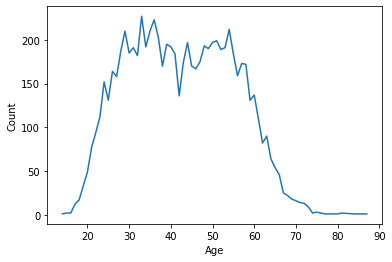

In [45]:
# finding relationship between age and accidental drug-caused death
ages = data.groupby('Age')['ID'].count().reset_index()
age_plt = sns.lineplot(data=ages, x='Age', y='ID')
age_plt.set(ylabel='Count')
age_plt

<AxesSubplot:xlabel='Age', ylabel='Count'>

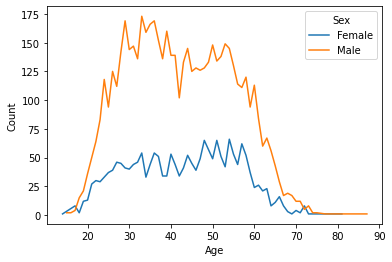

In [70]:
# finding relationship between age and accidental drug-caused death by gender
age_gender = data.groupby(['Sex', 'Age'])['ID'].count().reset_index()
age_gender = age_gender[age_gender.Sex != 'Unknown']
age_gender_plt = sns.lineplot(data=age_gender, x='Age', y='ID', hue='Sex')
age_gender_plt.set(ylabel='Count')
age_gender_plt